In [237]:
import networkx as nx
import numpy as np
import seaborn as sns

In [238]:
np.random.seed(42)
S1, S2 = 10, 20
N = S1 + S2
MF = min(S1, S2)

In [239]:
def restrictedMFMC(TOTAL_FLOW, weights):
    G = nx.DiGraph()
    SOURCE, FLUX_CAPACITOR, SINK = N, N + 1, N + 2
    G.add_nodes_from(range(0, N + 3))

    G.add_edge(SOURCE, FLUX_CAPACITOR, capacity=TOTAL_FLOW, weight=0)
    for i in range(S1):
        G.add_edge(FLUX_CAPACITOR, i, capacity=1, weight=0)
    for i in range(S2):
        G.add_edge(S1 + i, SINK, capacity=1, weight=0)
    for i in range(S1):
        for j in range(S1, N):
            G.add_edge(i, j, capacity = 1, weight=weights[i][j - S1])
    minCostFlow = nx.max_flow_min_cost(G, SOURCE, SINK)
    minCost = nx.cost_of_flow(G, minCostFlow)
    return minCost

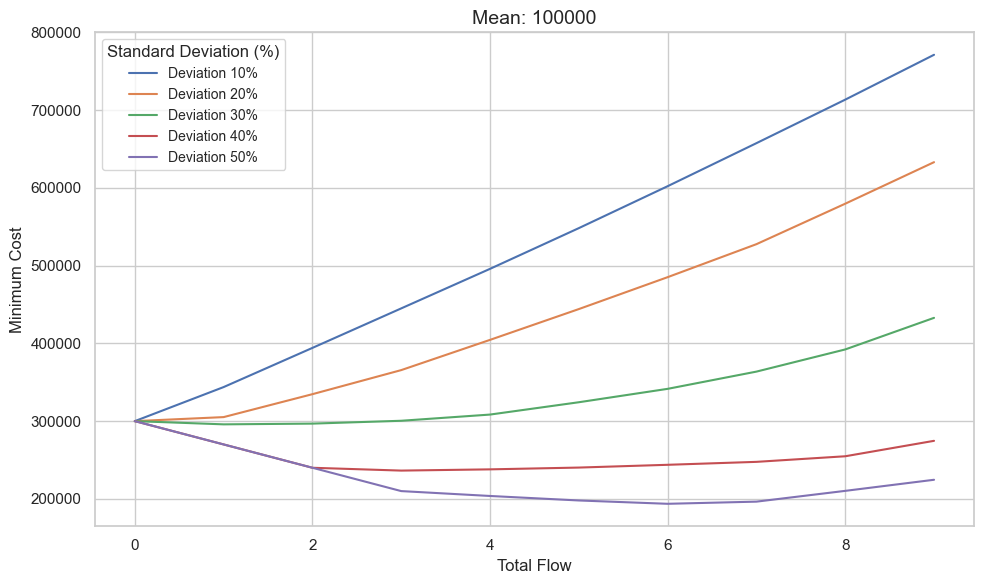

In [240]:
mean = 100000
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlabel("Total Flow", fontsize=12)
plt.ylabel("Minimum Cost", fontsize=12)
plt.title(f"Mean: {mean}", fontsize=14)

for std_percentage in range(10, 60, 10):
    results = []
    std = (std_percentage / 100) * mean 
    weights = np.random.normal(mean, std, size=(S1, S2)).astype(int).tolist()
    weights = [[max(0, w) for w in row] for row in weights]
    
    for TF in range(MF):
        results.append(restrictedMFMC(TF, weights) + 30000 * (MF - TF))
    
    sns.lineplot(x=range(MF), y=results, label=f'Deviation {std_percentage}%')

plt.legend(title="Standard Deviation (%)", fontsize=10)
plt.tight_layout()
plt.show()

In [241]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.xlabel("Total Flow", fontsize=12)
plt.ylabel("Minimum Cost", fontsize=12)
plt.title(f"Mean: {mean}", fontsize=14)

for std_percentage in range(10, 60, 10):
    results = []
    std = (std_percentage / 100) * mean 
    weights = np.random.normal(mean, std, size=(S1, S2)).astype(int).tolist()
    weights = [[max(0, w) for w in row] for row in weights]
    
    for TF in range(min(S1, S2)):
        results.append(restrictedMFMC(TF, weights) - S1 - )
    
    sns.lineplot(x=range(min(S1, S2)), y=results, label=f'Deviation {std_percentage}%')

plt.legend(title="Standard Deviation (%)", fontsize=10)
plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2774242775.py, line 14)